# **花卷学Python**
---

> **我年纪轻轻就学会了Python编程**


# **第十九章、Python项目实战**

   - [x] **人工智能实战**


---

# **一、人工智能实战**

---

# **深度学习：文本分类**


## **文本分类一般流程**

- **文本预处理：正则，分词**
- **建立词集映射**
- **文本词向量表征：word2vec（可选）**
- **分割数据集**
- **建立神经网络分类模型**
- **训练网络**
- **保存并评估**
- **画出训练损失图**
- **使用保存的模型预测新的文本**


## **主要使用的包**

- **numpy**
- **pandas**
- **matplotlib**
- **wordcloud**
- **jieba**
- **gensim**
- **tensorflow**


## **数据集介绍**

## **Thucnews新闻分类**


- **地址：http://thuctc.thunlp.org/#%E4%B8%AD%E6%96%87%E6%96%87%E6%9C%AC%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%86THUCNews**

   - THUCNews是根据新浪新闻RSS订阅频道2005~2011年间的历史数据筛选过滤生成，包含74万篇新闻文档（2.19 GB），均为UTF-8纯文本格式。

   - 我们在原始新浪新闻分类体系的基础上，重新整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐。


- **下载并解压：./examples/ai/data/THUCNews/THUCNews**


## **1. 浏览合并数据集**

In [27]:
from pathlib import Path

path = './examples/ai/data/THUCNews/THUCNews'
path = Path(path)

for x in path.glob('*'):
    if x.is_dir():
        label = x.name
        for y in x.glob('*.txt'):
            if y.is_file():
                print(f'{label}：{y}')
                break

体育：examples\ai\data\THUCNews\THUCNews\体育\0.txt
娱乐：examples\ai\data\THUCNews\THUCNews\娱乐\131604.txt
家居：examples\ai\data\THUCNews\THUCNews\家居\224236.txt
彩票：examples\ai\data\THUCNews\THUCNews\彩票\256822.txt
房产：examples\ai\data\THUCNews\THUCNews\房产\264410.txt
教育：examples\ai\data\THUCNews\THUCNews\教育\284460.txt
时尚：examples\ai\data\THUCNews\THUCNews\时尚\326396.txt
时政：examples\ai\data\THUCNews\THUCNews\时政\339764.txt
星座：examples\ai\data\THUCNews\THUCNews\星座\402850.txt
游戏：examples\ai\data\THUCNews\THUCNews\游戏\406428.txt
社会：examples\ai\data\THUCNews\THUCNews\社会\430801.txt
科技：examples\ai\data\THUCNews\THUCNews\科技\481650.txt
股票：examples\ai\data\THUCNews\THUCNews\股票\644579.txt
财经：examples\ai\data\THUCNews\THUCNews\财经\798977.txt


In [31]:
from pathlib import Path

path = './examples/ai/data/THUCNews/THUCNews'
path = Path(path)

number = {}
with open(path.parent.parent.joinpath('thucnews.txt'), 'w', encoding = 'utf-8') as f:
    f.write('label\ttitle\ttext\n')
    for x in path.glob('*'):
        if x.is_dir():
            label = x.name
            number[label] = 0
            for y in x.glob('*.txt'):
                if y.is_file():
                    with open(y, 'r', encoding='utf-8') as f1:
                        data = [line.strip() for line in f1 if line.strip()]
                    try:
                        title = data[0]
                        content = ''.join(data[1:])
                        if  len(content) <= 200 and len(content) >= 20:
                            f.write(f'{label}\t{title}\t{content}\n')
                            number[label] += 1
                    except:
                        continue
print(number)

{'体育': 7821, '娱乐': 9651, '家居': 12099, '彩票': 1061, '房产': 468, '教育': 3822, '时尚': 2426, '时政': 8202, '星座': 1578, '游戏': 1361, '社会': 1399, '科技': 13038, '股票': 26471, '财经': 2603}


## **2. 文本预处理**

以上合并好的文本全部统一到一个文件中：是一个三列N行的文本，使用pandas可以很方便的预处理

## **读取**

In [1]:
from pathlib import Path
import pandas as pd

path = './examples/ai'
path = Path(path)

df = pd.read_csv(path.joinpath('./data/thucnews.txt'), sep='\t', error_bad_lines=False)
df.head(5)

D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 28851: expected 3 fields, saw 8\nSkipping line 28856: expected 3 fields, saw 7\nSkipping line 28857: expected 3 fields, saw 8\nSkipping line 28858: expected 3 fields, saw 8\nSkipping line 84967: expected 3 fields, saw 4\nSkipping line 85118: expected 3 fields, saw 4\nSkipping line 85155: expected 3 fields, saw 4\nSkipping line 85233: expected 3 fields, saw 4\nSkipping line 88706: expected 3 fields, saw 7\nSkipping line 89361: expected 3 fields, saw 4\n'


,label,title,text
0,体育,图文-女排世锦赛6日战况 土耳其姑娘庆祝得分,新浪体育讯 北京时间11月6日，2010年世界女排锦标赛继续进行，E组第二轮比赛中，土耳其队...
1,体育,调查：奇才负骑士阿联2分 您如何看待他的低迷表现,新浪体育讯 北京时间11月7日，奇才在主场以102-107不敌骑士。易建联只打了14分钟，5...
2,体育,首发：波什迎来救赎良机 墨菲复出挑战热火三巨头,新浪体育讯 北京时间11月7日，热火回到主场迎战篮网，这是热火连续六个主场比赛的第一场。他们...
3,体育,开拓者vs湖人首发：科比对阵罗伊 内线两双塔之战,新浪体育讯 北京时间11月8日，NBA常规赛洛杉矶湖人主场迎战波特兰开拓者，赛前双方也公布了...
4,体育,调查-您认为加索尔是否称得上联盟第一内线？,新浪体育讯 北京时间11月8日，洛杉矶湖人主场大胜开拓者，豪取7连胜。保罗-加索尔表现惊艳，...


In [2]:
df.shape

(91990, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91990 entries, 0 to 91989
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   91990 non-null  object
 1   title   91990 non-null  object
 2   text    91990 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [4]:
for name,group in df.groupby(['label']):
    print(f'{name}: {group.shape}')

体育: (7821, 3)
娱乐: (9651, 3)
家居: (12095, 3)
彩票: (1061, 3)
房产: (468, 3)
教育: (3822, 3)
时尚: (2426, 3)
时政: (8202, 3)
星座: (1578, 3)
游戏: (1361, 3)
社会: (1399, 3)
科技: (13038, 3)
股票: (26465, 3)
财经: (2603, 3)


<AxesSubplot:ylabel='label'>

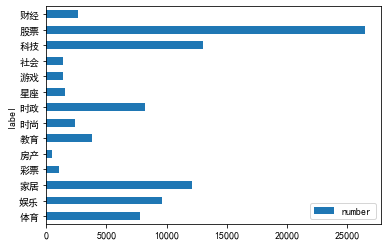

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False


number = {name: group.shape[0] for name,group in df.groupby(['label'])}
# pd.DataFrame.from_dict(number)
numebr = pd.DataFrame(number.items(),columns=['label','number'])
numebr.plot.barh(x = 'label', y = 'number')

## **去除数量很少的标签数据**

In [6]:
df = df[df['label'] != '房产']

for name,group in df.groupby(['label']):
    print(f'{name}: {group.shape}')

体育: (7821, 3)
娱乐: (9651, 3)
家居: (12095, 3)
彩票: (1061, 3)
教育: (3822, 3)
时尚: (2426, 3)
时政: (8202, 3)
星座: (1578, 3)
游戏: (1361, 3)
社会: (1399, 3)
科技: (13038, 3)
股票: (26465, 3)
财经: (2603, 3)


## **取出分析列：label和text**

In [7]:
df = df[['label','text']]
df.head(5)

,label,text
0,体育,新浪体育讯 北京时间11月6日，2010年世界女排锦标赛继续进行，E组第二轮比赛中，土耳其队...
1,体育,新浪体育讯 北京时间11月7日，奇才在主场以102-107不敌骑士。易建联只打了14分钟，5...
2,体育,新浪体育讯 北京时间11月7日，热火回到主场迎战篮网，这是热火连续六个主场比赛的第一场。他们...
3,体育,新浪体育讯 北京时间11月8日，NBA常规赛洛杉矶湖人主场迎战波特兰开拓者，赛前双方也公布了...
4,体育,新浪体育讯 北京时间11月8日，洛杉矶湖人主场大胜开拓者，豪取7连胜。保罗-加索尔表现惊艳，...


## **预处理**

## **正则**

- 对于中文文本分类，我们需要保留下一些对于文本有意义的文字，如：中文，英文，数字，去除一些没有意义的字符，如：标点，空格

In [8]:
import re

# df['text'] = df['text'].apply(lambda x: re.sub('[^0-9a-zA-Z\u4e00-\u9fa5 ]',' ',x).lower())

### 保留 中文 英文数字等，去除=等杂乱字符
df['text']=df['text'].str.replace('[^0-9a-zA-Z\u4e00-\u9fa5 ]',' ',regex=True)

### 全部转化为小写
df['text']=df['text'].str.lower()

## 去除空值项
df=df.dropna()

df

,label,text
0,体育,新浪体育讯 北京时间11月6日 2010年世界女排锦标赛继续进行 e组第二轮比赛中 土耳其队...
1,体育,新浪体育讯 北京时间11月7日 奇才在主场以102 107不敌骑士 易建联只打了14分钟 5...
2,体育,新浪体育讯 北京时间11月7日 热火回到主场迎战篮网 这是热火连续六个主场比赛的第一场 他们...
3,体育,新浪体育讯 北京时间11月8日 nba常规赛洛杉矶湖人主场迎战波特兰开拓者 赛前双方也公布了...
4,体育,新浪体育讯 北京时间11月8日 洛杉矶湖人主场大胜开拓者 豪取7连胜 保罗 加索尔表现惊艳 ...
...,...,...
91985,财经,marketwatch纽约10月8日讯 北京时间周四凌晨 纽约商业交易所11月交割的原油期...
91986,财经,金融时报 11月18日报道 保尔森对冲基金 paulson recovery fund 上...
91987,财经,2008年9月19日 美国国际集团 aig 宣布 aig董事会已任命爱德华 李迪 edwar...
91988,财经,中新网1月22日电美国楼市不景 白宫也不能幸免 据香港 文汇报 22日报道 房地产网站zil...


## **分词**

In [9]:
import re
import jieba
from pathlib import Path

def load_stopwords(file):
    with open(file,'r',encoding='utf-8') as f:
        sp = [x.strip() for x in f if x.strip()]
    return sp


def segment(x,stopwords = []):
    x = [
        y.replace(" ",'') for y in jieba.cut(x) 
        if y not in stopwords 
        and re.search('[a-zA-Z\u4e00-\u9fa5]+',y) 
        and len(y.replace(" ","")) >= 2 
    ]
    
    return " ".join(x) if len(x) > 0 else None


path = './examples/ai'
path = Path(path)
sp = path.joinpath('./data/哈工大停用词表.txt')
sp = load_stopwords(sp)

# 分词
df['text']=df['text'].apply(lambda x: segment(x))

## 去除空值项
df=df.dropna()

df

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 0.569 seconds.
Prefix dict has been built successfully.


,label,text
0,体育,新浪 体育讯 北京 时间 世界 女排 锦标赛 继续 进行 第二轮 比赛 土耳其队 战胜 塞尔...
1,体育,新浪 体育讯 北京 时间 奇才 主场 不敌 骑士 易建联 分钟 得到 助攻 对于 今天 低迷...
2,体育,新浪 体育讯 北京 时间 热火 回到 主场 迎战 篮网 这是 热火 连续 六个 主场 比赛 ...
3,体育,新浪 体育讯 北京 时间 nba 常规赛 洛杉矶 湖人 主场 迎战 波特兰 开拓者 赛前 双...
4,体育,新浪 体育讯 北京 时间 洛杉矶 湖人 主场 大胜 开拓者 豪取 连胜 保罗 加索尔 表现 ...
...,...,...
91985,财经,marketwatch 纽约 日讯 北京 时间 周四 凌晨 纽约 商业 交易所 交割 原油期...
91986,财经,金融时报 报道 保尔森 对冲 基金 paulson recovery fund 上周 开始 ...
91987,财经,美国 国际 集团 aig 宣布 aig 董事会 任命 爱德华 李迪 edward liddy...
91988,财经,中新网 日电 美国 楼市 不景 白宫 不能 幸免 香港 文汇报 报道 房地产 网站 zill...


## **根据分词筛选**

- 过滤分完词，词语个数较少的文本，即可认为：词语个数不够的文本表征不太好

In [10]:
length=df['text'].apply(lambda x: len(x.split()))
length.describe()
# length.hist()

count    91519.000000
mean        37.983752
std         15.656215
min          1.000000
25%         26.000000
50%         38.000000
75%         50.000000
max         81.000000
Name: text, dtype: float64

<AxesSubplot:>

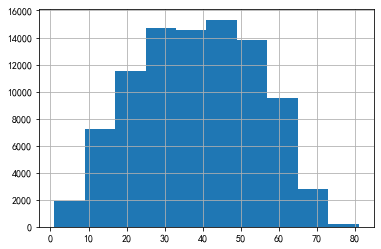

In [11]:
length.hist()

In [12]:
df['length'] = length
df

,label,text,length
0,体育,新浪 体育讯 北京 时间 世界 女排 锦标赛 继续 进行 第二轮 比赛 土耳其队 战胜 塞尔...,28
1,体育,新浪 体育讯 北京 时间 奇才 主场 不敌 骑士 易建联 分钟 得到 助攻 对于 今天 低迷...,23
2,体育,新浪 体育讯 北京 时间 热火 回到 主场 迎战 篮网 这是 热火 连续 六个 主场 比赛 ...,59
3,体育,新浪 体育讯 北京 时间 nba 常规赛 洛杉矶 湖人 主场 迎战 波特兰 开拓者 赛前 双...,42
4,体育,新浪 体育讯 北京 时间 洛杉矶 湖人 主场 大胜 开拓者 豪取 连胜 保罗 加索尔 表现 ...,28
...,...,...,...
91985,财经,marketwatch 纽约 日讯 北京 时间 周四 凌晨 纽约 商业 交易所 交割 原油期...,39
91986,财经,金融时报 报道 保尔森 对冲 基金 paulson recovery fund 上周 开始 ...,33
91987,财经,美国 国际 集团 aig 宣布 aig 董事会 任命 爱德华 李迪 edward liddy...,40
91988,财经,中新网 日电 美国 楼市 不景 白宫 不能 幸免 香港 文汇报 报道 房地产 网站 zill...,47


In [13]:
df = df[(df['length'] >= 10) & (df['length'] <= 70)]
df

,label,text,length
0,体育,新浪 体育讯 北京 时间 世界 女排 锦标赛 继续 进行 第二轮 比赛 土耳其队 战胜 塞尔...,28
1,体育,新浪 体育讯 北京 时间 奇才 主场 不敌 骑士 易建联 分钟 得到 助攻 对于 今天 低迷...,23
2,体育,新浪 体育讯 北京 时间 热火 回到 主场 迎战 篮网 这是 热火 连续 六个 主场 比赛 ...,59
3,体育,新浪 体育讯 北京 时间 nba 常规赛 洛杉矶 湖人 主场 迎战 波特兰 开拓者 赛前 双...,42
4,体育,新浪 体育讯 北京 时间 洛杉矶 湖人 主场 大胜 开拓者 豪取 连胜 保罗 加索尔 表现 ...,28
...,...,...,...
91985,财经,marketwatch 纽约 日讯 北京 时间 周四 凌晨 纽约 商业 交易所 交割 原油期...,39
91986,财经,金融时报 报道 保尔森 对冲 基金 paulson recovery fund 上周 开始 ...,33
91987,财经,美国 国际 集团 aig 宣布 aig 董事会 任命 爱德华 李迪 edward liddy...,40
91988,财经,中新网 日电 美国 楼市 不景 白宫 不能 幸免 香港 文汇报 报道 房地产 网站 zill...,47


In [14]:
df['length'].describe()

count    88578.000000
mean        38.654530
std         14.828398
min         10.000000
25%         27.000000
50%         39.000000
75%         50.000000
max         70.000000
Name: length, dtype: float64

In [15]:
for name,group in df.groupby(['label']):
    print(f'{name}: {group.shape}')

体育: (7730, 3)
娱乐: (9598, 3)
家居: (11347, 3)
彩票: (951, 3)
教育: (3702, 3)
时尚: (2376, 3)
时政: (8097, 3)
星座: (1577, 3)
游戏: (1342, 3)
社会: (1384, 3)
科技: (12772, 3)
股票: (25206, 3)
财经: (2496, 3)


In [16]:
## 去除数量太少的文本

df = df[df['label'] != '彩票']
for name,group in df.groupby(['label']):
    print(f'{name}: {group.shape}')

体育: (7730, 3)
娱乐: (9598, 3)
家居: (11347, 3)
教育: (3702, 3)
时尚: (2376, 3)
时政: (8097, 3)
星座: (1577, 3)
游戏: (1342, 3)
社会: (1384, 3)
科技: (12772, 3)
股票: (25206, 3)
财经: (2496, 3)


## **样本均衡**

- 原则上每个类别的文本需要一样多，不然对于结果的影响较大

In [17]:
## 取定最小数量的

min_data_nums = min(group.shape[0] for name,group in df.groupby(['label']))
min_data_nums

1342

In [18]:
newdf = pd.DataFrame()
for name,group in df.groupby(['label']):
    group=group.sample(n=min_data_nums)
    newdf = pd.concat([newdf,group])
df = newdf
df

,label,text,length
6590,体育,新浪 体育讯 北京 时间 中超联赛 比赛 正式 打响 天津 康师傅 主场 天津泰达 大球场 ...,43
2614,体育,新浪 体育讯 北京 时间 f1 比利时 大奖赛 在斯帕 赛道 开始 周五 两次 练习赛 图为...,26
1344,体育,新浪 体育讯 北京 时间 卡塔尔 亚洲杯 第二场 比赛 阿拉法 球场 打响 首次 亮相 中国...,54
5293,体育,新浪 体育讯 北京 时间 罗伯特 盖瑞古斯 robert garrigus 佛罗里达 时间 ...,39
5969,体育,新浪 体育讯 郑州 消息 今天 河南 思念 高尔夫 俱乐部 展开 全国 高尔夫 职业 邀请赛...,31
...,...,...,...
89585,财经,全景网 日讯 海富通 基金 管理 公司 今日 公告 海富通 稳健 添利 债券 型基金 日起 ...,53
91297,财经,中旬 开业 第一 创业 期货 意在 股指 期货 目前 只能 商品 期货 开始 起步 董事长 ...,39
89518,财经,本报记者 施俊 中银 基金 管理 公司 日前 发布公告 新增 旗下 四只 产品 中银 货币 ...,47
91724,财经,白亚洁 受到 隔夜 美棉 涨停 影响 周三 郑棉 主力 合约 高开高 全天 上涨 收报 涨幅...,50


In [19]:
for name,group in df.groupby(['label']):
    print(f'{name}: {group.shape}')

体育: (1342, 3)
娱乐: (1342, 3)
家居: (1342, 3)
教育: (1342, 3)
时尚: (1342, 3)
时政: (1342, 3)
星座: (1342, 3)
游戏: (1342, 3)
社会: (1342, 3)
科技: (1342, 3)
股票: (1342, 3)
财经: (1342, 3)


## **绘制词云：粗略看文本词语分布**

word count top 10：[('新浪', 1339), ('体育讯', 1132), ('时间', 985), ('北京', 917), ('比赛', 775), ('球员', 348), ('消息', 341), ('俱乐部', 310), ('图为', 287), ('高尔夫球', 283)]


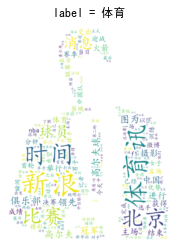

word count top 10：[('评论', 1276), ('我要', 637), ('新浪', 568), ('财经', 551), ('公司', 479), ('发表', 476), ('亿元', 474), ('消息', 467), ('欢迎', 442), ('成交', 363)]


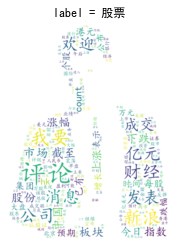

In [20]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

from collections import Counter
from wordcloud import WordCloud


## 设置词云字体
font = './examples/ai/data/simkai.ttf'

## 设置词云底图
mask = './examples/ai/data/huge.jpg'
### 读取mask即：背景样式图
mask = np.array(Image.open(mask))

## 设置最大展示词语数，词语太多显示不太好
maxwords = 200

## 标签太多设置只展示几个
labels = ['体育','股票']

for x in labels:
    newdf = df[df['label'] == x]
    wordlist = ' '.join(newdf['text']).split()
    ## 统计词频
    word_count = Counter(wordlist)
    print(f'word count top 10：{word_count.most_common(10)}')
    
    ## 生成词云
    wc = WordCloud(
        mask = mask,
        font_path = font,
        mode = 'RGBA',
        background_color = "white",
        max_words = maxwords
    ).generate_from_frequencies(word_count)
    
    ### 显示词云图
    plt.imshow(wc,interpolation="bilinear")
    plt.title(f"label = {x}")
    plt.axis("off")
    plt.show()
    ### 保存词云图，注意：必须先plt.show才能保存，否则保存为空白
    wc.to_file(f'./examples/ai/output/{x}.png')    

In [21]:
import IPython

IPython.display.HTML(f"""
   <table><tr>
        <td><img src='./examples/ai/output/体育.png' border=0></td>
        <td><img src='./examples/ai/output/股票.png' border=0></td>
    </tr></table>
""")

,


## **建立词集映射**

In [22]:
import json
import tensorflow as tf



def save_json(json_dict,file):
    '''保存json对象为json文件'''
    with open(file,'w',encoding='utf-8') as f:
        f.write(json.dumps(json_dict,indent=4,ensure_ascii=False))
    return 


def read_json(file):
    '''读取json文件转化为python对象'''
    with open(file,'r',encoding='utf-8') as f:
        json_dict = json.load(f)
    return json_dict



def create_tokenizer(data = None, tokenizer_config = None, create_switch = True):
    if not create_switch and os.path.isfile(tokenizer_config):
        # 由配置文件读取tokenizer对象
        tokenconfig = read_json(tokenizer_config)
        tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenconfig)
    else:
        # 初始化创建tokenizer对象
        tokenizer = tf.keras.preprocessing.text.Tokenizer()
        tokenizer.fit_on_texts(data)
        tokenconfig = tokenizer.to_json()
        save_json(tokenconfig,tokenizer_config)
    vocab = tokenizer.word_index
    return vocab, tokenizer


### 建立token 词语id特征转化
tokenizer_config = './examples/ai/output/tokenizer_config.json'
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['text'])
tokenconfig = tokenizer.to_json()
save_json(tokenconfig,tokenizer_config)
vocab = tokenizer.word_index

In [23]:
list(vocab.items())[:10]

[('新浪', 1),
 ('基金', 2),
 ('时间', 3),
 ('评论', 4),
 ('测试', 5),
 ('北京', 6),
 ('消息', 7),
 ('记者', 8),
 ('心理', 9),
 ('娱乐', 10)]

In [24]:
sen = [df['text'].values.tolist()[0]]
sen

['新浪 体育讯 北京 时间 中超联赛 比赛 正式 打响 天津 康师傅 主场 天津泰达 大球场 迎战 来访 河南 四五 比赛 进行 分钟 奥利 萨德贝 右路 突破 造成 王霄 犯规 河南队 获得 任意球 张璐 开出 任意球 直奔 球门 后角 守门员 杨君 受到 干扰 目送 皮球 入网']

In [25]:
sen = tokenizer.texts_to_sequences(sen)
print(sen)

[[1, 26, 6, 3, 3484, 39, 38, 1905, 1204, 8872, 397, 7566, 16161, 644, 10741, 2441, 13776, 39, 21, 405, 16162, 36811, 5601, 727, 156, 36812, 3268, 16163, 107, 4267, 36813, 3970, 4267, 25352, 4478, 25353, 16164, 25354, 463, 8145, 36814, 3269, 12072]]


## **保存处理完的数据集**

In [26]:
df.to_csv('./examples/ai/output/data.csv',sep='\t',index=False)

## **训练词向量**

Word2vec，是一群用来产生词向量的相关模型。这些模型为浅而双层的神经网络，用来训练以重新建构语言学之词文本。

网络以词表现，并且需猜测相邻位置的输入词，在word2vec中词袋模型假设下，词的顺序是不重要的。

训练完成之后，word2vec模型可用来映射每个词到一个向量，可用来表示词对词之间的关系，该向量为神经网络之隐藏层。

In [27]:
df = pd.read_csv('./examples/ai/output/data.csv',sep='\t')
df

,label,text,length
0,体育,新浪 体育讯 北京 时间 中超联赛 比赛 正式 打响 天津 康师傅 主场 天津泰达 大球场 ...,43
1,体育,新浪 体育讯 北京 时间 f1 比利时 大奖赛 在斯帕 赛道 开始 周五 两次 练习赛 图为...,26
2,体育,新浪 体育讯 北京 时间 卡塔尔 亚洲杯 第二场 比赛 阿拉法 球场 打响 首次 亮相 中国...,54
3,体育,新浪 体育讯 北京 时间 罗伯特 盖瑞古斯 robert garrigus 佛罗里达 时间 ...,39
4,体育,新浪 体育讯 郑州 消息 今天 河南 思念 高尔夫 俱乐部 展开 全国 高尔夫 职业 邀请赛...,31
...,...,...,...
16099,财经,全景网 日讯 海富通 基金 管理 公司 今日 公告 海富通 稳健 添利 债券 型基金 日起 ...,53
16100,财经,中旬 开业 第一 创业 期货 意在 股指 期货 目前 只能 商品 期货 开始 起步 董事长 ...,39
16101,财经,本报记者 施俊 中银 基金 管理 公司 日前 发布公告 新增 旗下 四只 产品 中银 货币 ...,47
16102,财经,白亚洁 受到 隔夜 美棉 涨停 影响 周三 郑棉 主力 合约 高开高 全天 上涨 收报 涨幅...,50


In [28]:
import gensim
import numpy as np

vector_size = 100

sentences = [x.split() for x in df['text']]

model = gensim.models.Word2Vec(sentences, vector_size = vector_size)
model.wv.save_word2vec_format('./examples/ai/output/word2vec.txt',binary=False)

## 加载词向量文件
model=gensim.models.KeyedVectors.load_word2vec_format('./examples/ai/output/word2vec.txt',binary=False)

In [29]:
%%bash
head -5 ./examples/ai/output/word2vec.txt

16160 100
鏂版氮 2.3813386 -0.5478794 0.47816712 -3.2796202 0.0069905864 0.068511575 -0.40059173 0.52693415 -2.6474957 -0.37302566 -1.4448053 0.70007116 0.10576602 -0.6887226 -1.3448894 0.45690638 2.6439612 0.31440607 -2.6862316 -1.696014 -1.2488773 -0.36570382 -1.6086361 -0.22086059 0.8044061 0.71405655 -0.047873165 0.5867958 0.49280274 2.108326 0.716345 -0.70955855 -3.3899279 -1.0704079 -0.035871577 1.1137524 1.551176 -0.8747128 0.28945053 -0.6558523 -0.71267194 -1.6617165 0.5863182 0.25231895 0.028423525 -1.2880855 -0.40140316 0.08109482 -1.7035353 -0.14712822 -1.3120477 0.47040516 -2.232929 1.0801734 -0.3649492 -1.4727714 0.045759648 -0.5098873 -1.9414674 -0.9797689 0.80702114 1.0112119 0.9665041 -0.43544775 1.1934831 2.6463153 1.6941038 -1.1542939 -1.2560049 -0.555094 -0.33402365 0.94341767 -1.6342028 -0.9795614 -1.2549733 -0.27796215 -0.6952142 2.0603607 0.6200024 -0.038610756 2.0936823 0.4856276 0.09085387 0.16017576 -1.5551652 -0.19578944 -0.581845 0.99994624 -0.68777096 0.0743235

In [30]:
### 获取词向量

model.get_vector('体育')

array([ 1.41732943e+00,  7.35201716e-01, -1.54500335e-01, -7.97829032e-01,
        2.93503940e-01,  1.20632812e-01, -7.36631691e-01, -8.02016556e-02,
        8.49611610e-02,  4.02068406e-01, -8.97523463e-01,  9.69072580e-01,
        5.18813610e-01, -4.44744080e-01, -1.33783007e+00, -1.40296698e-01,
        1.24475384e+00,  9.43270147e-01, -8.49208355e-01, -1.24162507e+00,
       -1.33814836e+00, -3.29156846e-01, -1.31104493e+00, -1.06402564e+00,
        2.53544033e-01,  9.33660120e-02, -9.28928614e-01, -7.49033570e-01,
       -1.30576476e-01,  8.62008572e-01,  1.60910860e-01, -5.72423860e-02,
       -1.35674071e+00, -1.66880395e-02, -2.90706336e-01,  9.05087233e-01,
        3.30565095e-01, -2.96639711e-01,  3.16367716e-01, -1.01787519e+00,
        4.03490394e-01, -3.95368069e-01,  4.38406616e-01,  8.62559378e-02,
       -3.86621267e-01, -6.90843225e-01,  1.04401685e-01, -1.37433374e+00,
       -3.42879325e-01, -1.26914814e-01, -3.50415558e-01, -5.82231522e-01,
       -9.72747922e-01,  

In [31]:
### 获取相似词

model.most_similar('决赛')

[('迎战', 0.9713698625564575),
 ('图为', 0.9713448286056519),
 ('主场', 0.970580518245697),
 ('首轮', 0.9690435528755188),
 ('球手', 0.9640939831733704),
 ('选手', 0.9606283903121948),
 ('讨论', 0.959915280342102),
 ('语文', 0.9556101560592651),
 ('客场', 0.9555980563163757),
 ('战胜', 0.9541428685188293)]

## **通过词集映射加载相应的词语向量**

In [32]:
import numpy as np

embedding_matrix = []
# 首先加id为0的初始词向量,一次加载每个词的词向量
embedding_matrix.append(np.zeros(vector_size))

for word in vocab:
    try:
        embedding_matrix.append(model.get_vector(word))
    except:
        ### 不存在的词：OOV
        embedding_matrix.append(np.zeros(vector_size))
        
embedding_matrix = np.array(embedding_matrix)
embedding_matrix.shape

(71197, 100)

In [33]:
len(vocab)

71196

In [34]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.3813386 , -0.5478794 ,  0.47816712, ..., -0.11167188,
         1.61382473,  1.47944403],
       [-1.75614011,  0.69639271,  0.25932664, ...,  2.11577272,
        -0.5378589 ,  1.63335419],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## **分割数据集：训练集和测试集（9:1，常用比例：7-3,8-2等）**

In [35]:
df

,label,text,length
0,体育,新浪 体育讯 北京 时间 中超联赛 比赛 正式 打响 天津 康师傅 主场 天津泰达 大球场 ...,43
1,体育,新浪 体育讯 北京 时间 f1 比利时 大奖赛 在斯帕 赛道 开始 周五 两次 练习赛 图为...,26
2,体育,新浪 体育讯 北京 时间 卡塔尔 亚洲杯 第二场 比赛 阿拉法 球场 打响 首次 亮相 中国...,54
3,体育,新浪 体育讯 北京 时间 罗伯特 盖瑞古斯 robert garrigus 佛罗里达 时间 ...,39
4,体育,新浪 体育讯 郑州 消息 今天 河南 思念 高尔夫 俱乐部 展开 全国 高尔夫 职业 邀请赛...,31
...,...,...,...
16099,财经,全景网 日讯 海富通 基金 管理 公司 今日 公告 海富通 稳健 添利 债券 型基金 日起 ...,53
16100,财经,中旬 开业 第一 创业 期货 意在 股指 期货 目前 只能 商品 期货 开始 起步 董事长 ...,39
16101,财经,本报记者 施俊 中银 基金 管理 公司 日前 发布公告 新增 旗下 四只 产品 中银 货币 ...,47
16102,财经,白亚洁 受到 隔夜 美棉 涨停 影响 周三 郑棉 主力 合约 高开高 全天 上涨 收报 涨幅...,50


In [36]:
from sklearn.model_selection import train_test_split


train, test = pd.DataFrame(), pd.DataFrame()

### 按照类别分组，从每组抽取9:1训练测试集，再整合
test_size = 0.1

for name,group in df.groupby(['label']):
    
    trainx,testx,trainy,testy = train_test_split(group['text'], group['label'], test_size=test_size)
    
    traind = pd.concat([trainx, trainy], axis=1)
    testd = pd.concat([testx, testy], axis=1)
    train = pd.concat([train, traind])
    test = pd.concat([test, testd])

train.columns = ['text','label']
test.columns = ['text','label']

In [37]:
print('# Train data set shape:')
for name,group in train.groupby(['label']):
    print(name,group.shape)
    
print('# Test data set shape:')
for name,group in test.groupby(['label']):
    print(name,group.shape)

# Train data set shape:
体育 (1207, 2)
娱乐 (1207, 2)
家居 (1207, 2)
教育 (1207, 2)
时尚 (1207, 2)
时政 (1207, 2)
星座 (1207, 2)
游戏 (1207, 2)
社会 (1207, 2)
科技 (1207, 2)
股票 (1207, 2)
财经 (1207, 2)
# Test data set shape:
体育 (135, 2)
娱乐 (135, 2)
家居 (135, 2)
教育 (135, 2)
时尚 (135, 2)
时政 (135, 2)
星座 (135, 2)
游戏 (135, 2)
社会 (135, 2)
科技 (135, 2)
股票 (135, 2)
财经 (135, 2)


## **打乱数据集**

- 增加模型泛华能力
- 同一分布

In [38]:
from sklearn.utils import shuffle

train = shuffle(train)
test = shuffle(test)

In [39]:
train

,text,label
15462,小麦 三等 小麦 混合 最低 收购价 提高 公斤 分别 提高,财经
5704,导语 女孩 喜欢 繁杂 怎么办 简约 搭配 帮你忙 军装 外套 长袖 再配 一双 短靴 潮人...,时尚
13139,ipod 造型 玩意 已经 不再 新鲜 不过 产品 巧妙 经过 修饰 感觉 完全 不同 样子...,科技
15060,本报记者 徐婧婧 日前 兴业 基金 编译 社会 责任 投资 创造财富 改变 世界 问世 该书...,财经
15120,今起 发行 本报记者 施俊 今日 申万 巴黎 添益宝 债券 基金 全国 正式 发行 基金 经...,财经
...,...,...
5077,本报讯 今年 香港 高校 继续 面向 河北 招生 其中 香港城市大学 香港中文大学 两所 香...,教育
7206,晨报讯 记者 晶晶 记者 香港大学 获悉 该校 今年 新增 药剂学 通识 教育 计量 财务 ...,时政
8974,独家 撰稿 海衣 苍朵 心理 测试 征稿启事 经济 适用 定义 吸烟 喝酒 关机 赌钱 红颜...,星座
4680,提交 系统 自动 生成 所得 分数 高考 信息 访问 新浪 高考 频道 高考 论坛 高考 博...,教育


## **转化词语为vocab id**

In [40]:
import tensorflow as tf

maxlen = 70


def data_to_seq(data,tokenizer,maxlen):
    # 序列模式，max_len同意序列长度，超过则过滤，不足则补0
    data_ids = tokenizer.texts_to_sequences(data)
    data_seq = tf.keras.preprocessing.sequence.pad_sequences(
        data_ids,
        maxlen = maxlen,
        padding = 'post'
    )
    return data_seq


trainx = data_to_seq(train['text'], tokenizer, maxlen)
testx = data_to_seq(test['text'], tokenizer, maxlen)

In [41]:
trainx

array([[ 4867, 70540,  4867, ...,     0,     0,     0],
       [  172,   765,   125, ...,     0,     0,     0],
       [ 3800,   228, 35472, ...,     0,     0,     0],
       ...,
       [   31,    35,  1173, ...,     0,     0,     0],
       [ 1170,    44,   121, ...,     0,     0,     0],
       [ 6202,  4650,   366, ...,     0,     0,     0]])

## **转化标签为one-hot形式**

In [42]:
label2id = {x: idx for idx,x in enumerate(set(df['label']))}
save_json(label2id, './examples/ai/output/label2id.json')
label2id

{'星座': 0,
 '股票': 1,
 '教育': 2,
 '体育': 3,
 '科技': 4,
 '社会': 5,
 '娱乐': 6,
 '时尚': 7,
 '时政': 8,
 '财经': 9,
 '游戏': 10,
 '家居': 11}

In [43]:
train['label'] = train['label'].apply(lambda x: label2id[x])
test['label'] = test['label'].apply(lambda x: label2id[x])

train

,text,label
15462,小麦 三等 小麦 混合 最低 收购价 提高 公斤 分别 提高,9
5704,导语 女孩 喜欢 繁杂 怎么办 简约 搭配 帮你忙 军装 外套 长袖 再配 一双 短靴 潮人...,7
13139,ipod 造型 玩意 已经 不再 新鲜 不过 产品 巧妙 经过 修饰 感觉 完全 不同 样子...,4
15060,本报记者 徐婧婧 日前 兴业 基金 编译 社会 责任 投资 创造财富 改变 世界 问世 该书...,9
15120,今起 发行 本报记者 施俊 今日 申万 巴黎 添益宝 债券 基金 全国 正式 发行 基金 经...,9
...,...,...
5077,本报讯 今年 香港 高校 继续 面向 河北 招生 其中 香港城市大学 香港中文大学 两所 香...,2
7206,晨报讯 记者 晶晶 记者 香港大学 获悉 该校 今年 新增 药剂学 通识 教育 计量 财务 ...,8
8974,独家 撰稿 海衣 苍朵 心理 测试 征稿启事 经济 适用 定义 吸烟 喝酒 关机 赌钱 红颜...,0
4680,提交 系统 自动 生成 所得 分数 高考 信息 访问 新浪 高考 频道 高考 论坛 高考 博...,2


In [44]:
trainy = tf.keras.utils.to_categorical(train['label'])
testy = tf.keras.utils.to_categorical(test['label'])

In [97]:
print('# Trian set and Test set: ')
print('Train set: ', trainx.shape, trainy.shape)
print('Test set: ', testx.shape, testy.shape)

# Trian set and Test set: 
Train set:  (14484, 70) (14484, 12)
Test set:  (1620, 70) (1620, 12)


## **建立神经网络分类模型**

- **输入层**
- **Embedding层（词嵌入层）**
- **网络层（CNN，RNN，LSTM等）**
- **Dropout层（可选）**
- **Flatten层**
- **输出层（分类层）**
- **编译（优化器和损失函数）**
- **训练和回调**
- **预测**


## **经典的文本分类模型：CNN**


![](./examples/ai/2.png)



## **经典的文本分类模型：BiLstm**


![](./examples/ai/1.webp)

## **定义网络**

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 70)]         0           []                               
                                                                                                  
 embedding_11 (Embedding)       (None, 70, 100)      7119700     ['input_10[0][0]']               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 70, 100)      30100       ['embedding_11[0][0]']           
                                                                                                  
 conv1d_4 (Conv1D)              (None, 70, 100)      40100       ['embedding_11[0][0]']           
                                                                                            

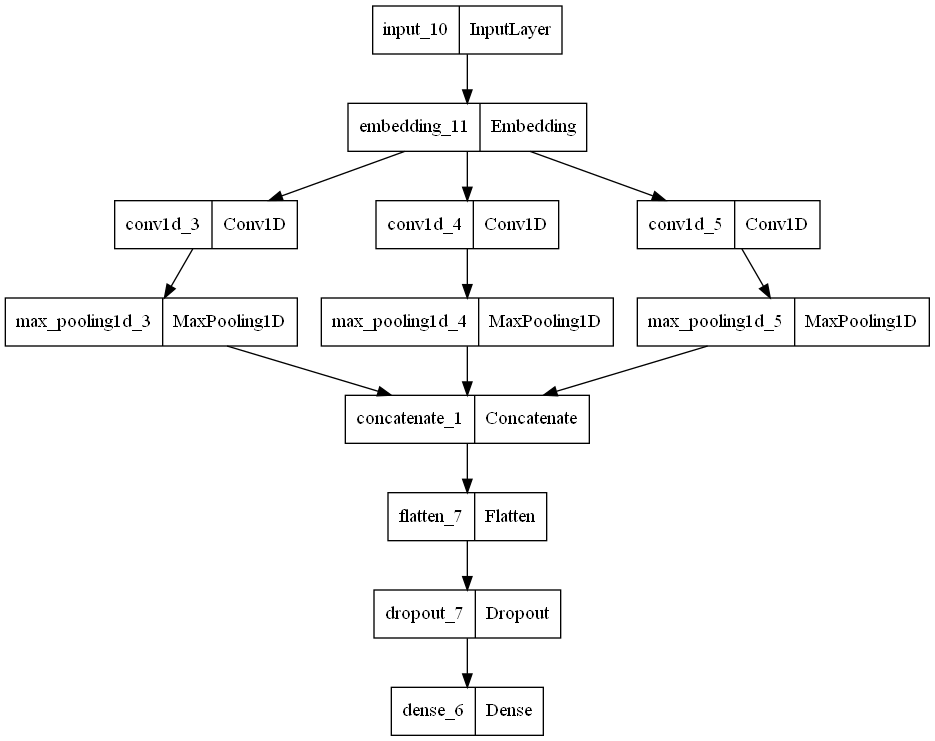

In [98]:
"""
Text CNN 文本分类模型
"""

import tensorflow as tf


def textcnn(maxlen,vocab_size,embedding_dim,embedding_matrix,cnn_filter_size,cnn_filter_num,dropout_rate,class_num):
    inputx = tf.keras.layers.Input(shape=(maxlen,))
    embx = tf.keras.layers.Embedding(
        vocab_size,
        embedding_dim,
        weights = [embedding_matrix]
    )(inputx)

    ### 卷积池化层
    convs = []
    for size in cnn_filter_size:
        conv = tf.keras.layers.Conv1D(
            cnn_filter_num,
            size,
            padding='same',
            strides=1,
            activation='relu'
        )(embx)
        conv = tf.keras.layers.MaxPooling1D(
            padding = 'same',
            pool_size=size
        )(conv)
        
        convs.append(conv)
        
    ## 拼接卷积池化层输出
    convs = tf.keras.layers.Concatenate(axis=1)(convs)    
    
    convs = tf.keras.layers.Flatten()(convs)
    convs = tf.keras.layers.Dropout(dropout_rate)(convs)
    output = tf.keras.layers.Dense(
        class_num,
        activation='softmax'
    )(convs)
    model = tf.keras.models.Model(inputs = inputx, outputs = output)
    return model


maxlen = 70
vocab_size = len(vocab) + 1
embedding_dim = 100
embedding_matrix = embedding_matrix
cnn_filter_size = [3,4,5]
cnn_filter_num = 100
dropout_rate = 0.3
class_num = len(label2id)

cnn_model = textcnn(maxlen,vocab_size,embedding_dim,embedding_matrix,cnn_filter_size,cnn_filter_num,dropout_rate,class_num)
cnn_model.summary()
tf.keras.utils.plot_model(cnn_model)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 70)]              0         
                                                                 
 embedding_12 (Embedding)    (None, 70, 100)           7119700   
                                                                 
 bidirectional_7 (Bidirectio  (None, 70, 64)           34048     
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 70, 64)            0         
                                                                 
 flatten_8 (Flatten)         (None, 4480)              0         
                                                                 
 dense_7 (Dense)             (None, 12)                53772     
                                                           

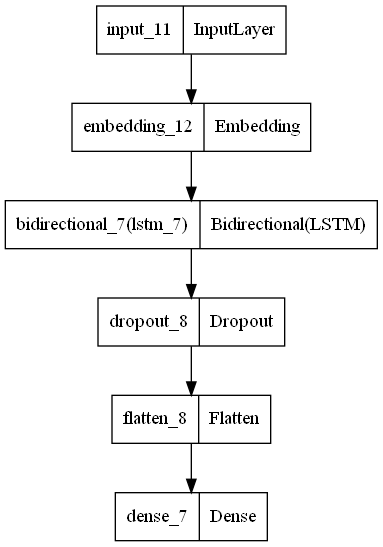

In [99]:
"""
Text BiLSTM 文本分类模型
"""

import tensorflow as tf



def textbilstm(maxlen,vocab_size,embedding_dim,embedding_matrix,rnn_unit_num,dropout_rate,class_num):
    inputx = tf.keras.layers.Input(shape=(maxlen,))
    embx = tf.keras.layers.Embedding(
        vocab_size,
        embedding_dim,
        weights = [embedding_matrix]
    )(inputx)
    lstmx = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            units=rnn_unit_num,
            return_sequences=True,
            activation='relu'
        )
    )(embx)
    lstmx = tf.keras.layers.Dropout(dropout_rate)(lstmx)
    lstmx = tf.keras.layers.Flatten()(lstmx)
    output = tf.keras.layers.Dense(
        class_num,
        activation='softmax'
    )(lstmx)
    model = tf.keras.models.Model(inputs = inputx, outputs = output)
    return model


maxlen = 70
vocab_size = len(vocab) + 1
embedding_dim = 100
embedding_matrix = embedding_matrix
rnn_unit_num = 32
dropout_rate = 0.3
class_num = len(label2id)

bilstm_model = textbilstm(maxlen,vocab_size,embedding_dim,embedding_matrix,rnn_unit_num,dropout_rate,class_num)
bilstm_model.summary()
tf.keras.utils.plot_model(bilstm_model)

## **编译模型**

In [100]:
opt = tf.keras.optimizers.Adam()

cnn_model.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

bilstm_model.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## **定义训练回调函数**

- **所谓的回调函数其实就是，想在训练期间做一些事情，比如：记录损失，早停等**

In [101]:
import os
import numpy as np
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


class CustomCallbacks(tf.keras.callbacks.Callback):
    '''自定义回调函数'''
    def __init__(self,file):
        super(CustomCallbacks,self).__init__()
        self.file = file
        self.epoch_id = []

    def on_train_begin(self,logs: dict):
        '''整个训练开始时会调用函数'''
        self.fp = open(self.file,'a',encoding='utf-8')
        self.fp.write("epoch\tbatch\tloss\tacc\n")
        return

    def on_train_end(self,logs: dict):
        '''整个训练结束时会调用函数'''
        self.fp.close()
        return

    def on_epoch_begin(self,epoch,logs:dict):
        '''整个训练每个epoch开始时会调用函数'''
        self.epoch_id.append(epoch)
        return

    def on_epoch_end(self,epoch,logs:dict):
        '''整个训练每个epoch结束时会调用函数'''
        self.epoch_id = []
        return

    def on_batch_begin(self,batch,logs:dict):
        '''整个训练每个batch开始时会调用函数'''
        return

    def on_batch_end(self,batch,logs:dict):
        '''整个训练每个batch结束时会调用函数'''
        self.fp.write(f"{self.epoch_id[0]}\t{batch}\t{logs['loss']}\t{logs['accuracy']}\n")
        return


def modelcheckpoint(filepath = './result',
                    monitor = 'val_accuracy',
                    save_weights_only = True,
                    save_best_only = True,
                    mode = 'auto',
                    verbose = 1,
                    period = 1
    ):
    '''设定callback保存最佳模型：

    Args：
        filepath:                   保存路径
        monitor:                    被监测的数据
        save_weights_only:          是否只保存权重
        save_best_only:             是否保存最佳模型
        mode:                       {auto, min, max} 的其中之一，如果save_best_only = True,那么
                                    是否覆盖保存文件取决于检测的数据的最大值或者最小值。
                                    对于val_accuracy: 取max，val_loss: 取min
                                    auto，方向会从被监测的数据名字中判断出来
        verbose:                    详细信息模型：0或者1
        period:                     每个检查点之间的间隔（轮数）
    '''
    filename = "model-weight.h5"
    modelfile = os.path.join(filepath,filename)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        modelfile,
        monitor = monitor,
        save_best_only = save_best_only,
        save_weights_only = save_weights_only,
        mode = mode,
        verbose = verbose,
        period = period
    )
    return checkpoint


def earlycheckpoint(monitor = 'val_accuracy',
                    min_delta = 0,
                    patience = 3,
                    mode = 'auto',
                    baseline = None,
                    verbose = 0,
                    restore_best_weights = False
    ):
    '''设定callback训练早停：

    Args：
        monitor:                    被监测的数据
        min_delta:                  被监测数据被认为是提升的最小变化值，小于则没有提升
        patience:                   没有进步的训练轮数，之后训练停止
        mode:                       {auto, min, max} 的其中之一，如果save_best_only = True,那么
                                    是否覆盖保存文件取决于检测的数据的最大值或者最小值。
                                    对于val_accuracy: 取max，val_loss: 取min
                                    auto，方向会从被监测的数据名字中判断出来
        baseline:                   要监控数值的基准值，如果没有盖上则训练停止
        verbose:                    详细信息模式
        restore_best_weights:       是否从被监测最佳值的时期恢复模型权重，
                                    如果是False则使用训练最后一步获得的模型权重
    '''
    checkpoint = tf.keras.callbacks.EarlyStopping(
        monitor = monitor,
        min_delta = min_delta,
        patience = patience,
        verbose = verbose,
        mode = mode,
        baseline = baseline,
        restore_best_weights = restore_best_weights
    )
    return checkpoint


def tensorboard(log_dir = './logs',
                histogram_freq = 0,
                write_graph = True,
                write_images = False,
                embeddings_freq = 0,
                embeddings_layer_names = None,
                embeddings_metadata = None
    ):
    '''Tensorboard训练可视化

    Args：
        log_dir = './logs',             用来保存tensorboard分析日志的路径
        histogram = 0,                  对于模型各个层计算激活值和模型权重直方图概率
                                        如果设置为0，直方图不会被计算，对于直方图可视化的验证数据一定要明确指出
        write_graph = True,             是否在可视化中显示图像，如果为True，则日志可能会很大
        write_images = False,           是否在可视化中将模型权重以图片可视化
        embeddings_freq = 0,            被选中的嵌入层保存的评率
        embeddings_layer_names = None,  一个list，会被监测的层的名字，如果为None，则监测所有层
        embeddings_metadata = None      要嵌入在embeddings_layer_names指定层的数据
                                        单个输入为numpy数组，多个输入numpy数组列表
        batch_size:                     用以在直方图计算的传入神经元输入批大小
        update_freq:                    batch 或者 epoch 或者 整数，batch为每个batch后写入
                                        epoch为每个epoch结束后写入
                                        如果是整数，例如 100，则表示在没100个样本之后写入
                                        注意：写入频繁会减缓训练速度
    '''
    checkpoint = tf.keras.callbacks.TensorBoard(
        log_dir = log_dir,
        histogram_freq = histogram_freq,
        write_graph = write_graph,
        write_images = write_images,
        embeddings_freq = embeddings_freq,
        embeddings_layer_names = embeddings_layer_names,
        embeddings_metadata = embeddings_metadata
    )
    return checkpoint


In [102]:
ts = tensorboard(log_dir = './examples/ai/output/cnn')
ccb = CustomCallbacks('./examples/ai/output/cnn_train_log.csv')
cnn_callbacks_list = [ts, ccb]


ts = tensorboard(log_dir = './examples/ai/output/bilstm')
ccb = CustomCallbacks('./examples/ai/output/bilstm_train_log.csv')
bilstm_callbacks_list = [ts, ccb]

## **训练和保存**

In [103]:
batch_size = 128
epochs = 5

cnn_history=cnn_model.fit(
    trainx,       
    trainy,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(testx, testy),
    callbacks=cnn_callbacks_list,
    shuffle=True
)

cnn_model.save_weights('./examples/ai/output/cnn_model_weights.h5')

Epoch 1/5
114/114 [==============================] - 18s 156ms/step - loss: 0.9679 - accuracy: 0.6693 - val_loss: 0.6450 - val_accuracy: 0.7821
Epoch 2/5
114/114 [==============================] - 17s 146ms/step - loss: 0.5482 - accuracy: 0.8166 - val_loss: 0.5335 - val_accuracy: 0.8247
Epoch 3/5
114/114 [==============================] - 17s 148ms/step - loss: 0.3594 - accuracy: 0.8902 - val_loss: 0.4452 - val_accuracy: 0.8469
Epoch 4/5
114/114 [==============================] - 17s 147ms/step - loss: 0.2139 - accuracy: 0.9403 - val_loss: 0.3738 - val_accuracy: 0.8802
Epoch 5/5
114/114 [==============================] - 17s 147ms/step - loss: 0.1145 - accuracy: 0.9729 - val_loss: 0.3525 - val_accuracy: 0.8914


In [104]:
pd.DataFrame(cnn_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.967950,0.669290,0.645038,0.782099
1,0.548163,0.816625,0.533464,0.824691
2,0.359437,0.890224,0.445165,0.846914
3,0.213861,0.940348,0.373788,0.880247
4,0.114545,0.972867,0.352524,0.891358


In [105]:
batch_size = 128
epochs = 5

bilstm_history=bilstm_model.fit(
    trainx,       
    trainy,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(testx, testy),
    callbacks=bilstm_callbacks_list,
    shuffle=True
)

bilstm_model.save_weights('./examples/ai/output/bilstm_model_weights.h5')

Epoch 1/5
114/114 [==============================] - 16s 132ms/step - loss: 31.8525 - accuracy: 0.5607 - val_loss: 0.8747 - val_accuracy: 0.7525
Epoch 2/5
114/114 [==============================] - 14s 126ms/step - loss: 0.7639 - accuracy: 0.7687 - val_loss: 0.6349 - val_accuracy: 0.7920
Epoch 3/5
114/114 [==============================] - 14s 126ms/step - loss: 0.5194 - accuracy: 0.8398 - val_loss: 0.5790 - val_accuracy: 0.8216
Epoch 4/5
114/114 [==============================] - 14s 127ms/step - loss: 0.3864 - accuracy: 0.8870 - val_loss: 0.5132 - val_accuracy: 0.8432
Epoch 5/5
114/114 [==============================] - 14s 126ms/step - loss: 0.2760 - accuracy: 0.9194 - val_loss: 0.4640 - val_accuracy: 0.8611


In [106]:
pd.DataFrame(bilstm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,31.852495,0.560688,0.874717,0.752469
1,0.763884,0.768710,0.634880,0.791975
2,0.519437,0.839823,0.579012,0.821605
3,0.386404,0.887048,0.513212,0.843210
4,0.276020,0.919428,0.464044,0.861111


## **训练画图**

In [107]:
log = pd.read_csv('./examples/ai/output/cnn_train_log.csv',sep='\t')
log

,epoch,batch,loss,acc
0,0,0,2.706292,0.109375
1,0,1,2.596880,0.144531
2,0,2,2.466995,0.190104
3,0,3,2.361446,0.216797
4,0,4,2.255475,0.251563
...,...,...,...,...
565,4,109,0.113779,0.973082
566,4,110,0.114239,0.972973
567,4,111,0.114819,0.972796
568,4,112,0.114620,0.972898


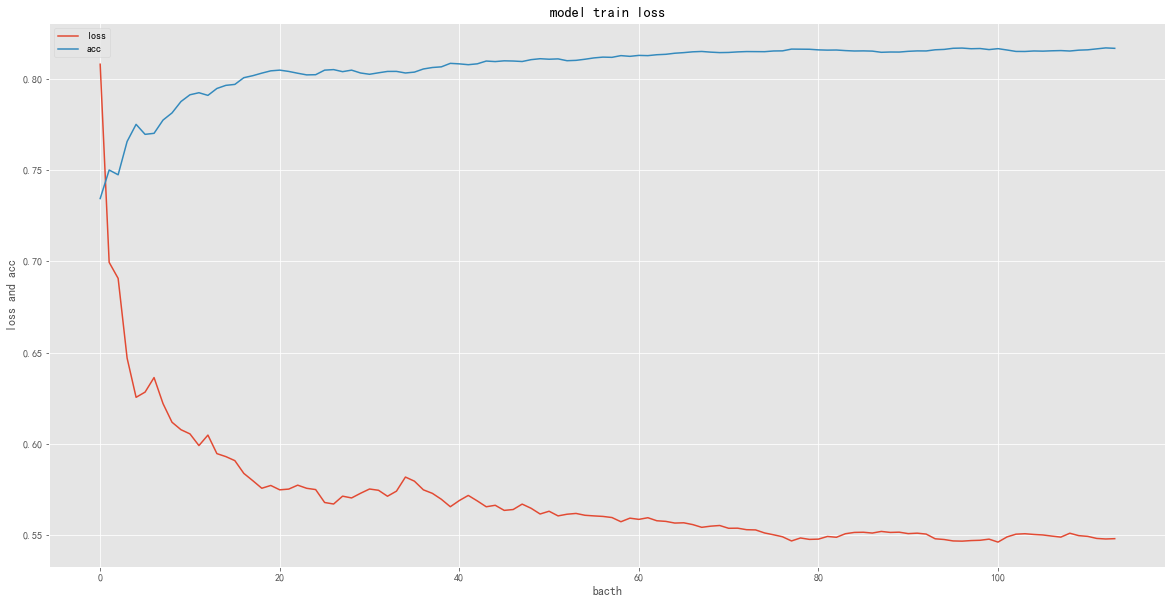

In [113]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns


### 训练损失画图
plt.figure(figsize=(20,10))
sns.lineplot(log[log['epoch'] == 1]['batch'],log[log['epoch'] == 1]['loss'],label='loss')
sns.lineplot(log[log['epoch'] == 1]['batch'],log[log['epoch'] == 1]['acc'],label='acc')
plt.xlabel("bacth")
plt.ylabel("loss and acc")
plt.legend()
plt.title(f"model train loss")
plt.show()

## **预测**

In [114]:
## 加载权重

cnn_model = textcnn(maxlen,vocab_size,embedding_dim,embedding_matrix,cnn_filter_size,cnn_filter_num,dropout_rate,class_num)
cnn_model.load_weights('./examples/ai/output/cnn_model_weights.h5')


bilstm_model = textbilstm(maxlen,vocab_size,embedding_dim,embedding_matrix,rnn_unit_num,dropout_rate,class_num)
bilstm_model.load_weights('./examples/ai/output/bilstm_model_weights.h5')


In [115]:
import re
import jieba
from pathlib import Path

def load_stopwords(file):
    with open(file,'r',encoding='utf-8') as f:
        sp = [x.strip() for x in f if x.strip()]
    return sp


def segment(x,stopwords = []):
    x = [
        y.replace(" ",'') for y in jieba.cut(x) 
        if y not in stopwords 
        and re.search('[a-zA-Z\u4e00-\u9fa5]+',y) 
        and len(y.replace(" ","")) >= 2 
    ]
    
    return " ".join(x) if len(x) > 0 else None


path = './examples/ai'
path = Path(path)
sp = path.joinpath('./data/哈工大停用词表.txt')
sp = load_stopwords(sp)


text = '新浪体育讯　12月27日晚，“冠军高尔夫球队迎新高球欢乐派对”活动在北京都市名人高尔夫俱乐部举行'
text = re.sub('[^0-9a-zA-Z\u4e00-\u9fa5 ]',' ',text)
text

'新浪体育讯 12月27日晚  冠军高尔夫球队迎新高球欢乐派对 活动在北京都市名人高尔夫俱乐部举行'

In [116]:
text = segment(text,stopwords=sp)
text

'新浪 体育讯 日晚 冠军 高尔夫球 迎新 高球 欢乐 派对 活动 北京 都市 名人 高尔夫 俱乐部 举行'

In [125]:
import json
import tensorflow as tf



def save_json(json_dict,file):
    '''保存json对象为json文件'''
    with open(file,'w',encoding='utf-8') as f:
        f.write(json.dumps(json_dict,indent=4,ensure_ascii=False))
    return 


def read_json(file):
    '''读取json文件转化为python对象'''
    with open(file,'r',encoding='utf-8') as f:
        json_dict = json.load(f)
    return json_dict



def data_to_seq(data,tokenizer,maxlen):
    # 序列模式，max_len同意序列长度，超过则过滤，不足则补0
    data_ids = tokenizer.texts_to_sequences(data)
    data_seq = tf.keras.preprocessing.sequence.pad_sequences(
        data_ids,
        maxlen = maxlen,
        padding = 'post'
    )
    return data_seq


### 建立token 词语id特征转化
tokenizer_config = './examples/ai/output/tokenizer_config.json'
tokenconfig = read_json(tokenizer_config)
tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenconfig)
id2label = {y:x for x,y in label2id.items()}

maxlen = 70

inputx = data_to_seq([text.split()],tokenizer,maxlen)
inputx

array([[    1,    26,   369,   255,   283, 29879,  5103,  2700,  1787,
           76,     6,  3519,  3015,   311,   244,    50,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [126]:
label = cnn_model.predict(inputx).argmax().item()
label

3

In [127]:
id2label[label]

'体育'

In [128]:
label = bilstm_model.predict(inputx).argmax().item()
id2label[label]

'体育'

## **以API接口的形式向外提供预测服务**

In [131]:
# %load ./examples/ai/app.py
import re
import json
import jieba
from pathlib import Path
import tensorflow as tf
import uvicorn
from fastapi import FastAPI,Request



def read_json(file):
    '''读取json文件转化为python对象'''
    with open(file,'r',encoding='utf-8') as f:
        json_dict = json.load(f)
    return json_dict


def load_stopwords(file):
    with open(file,'r',encoding='utf-8') as f:
        sp = [x.strip() for x in f if x.strip()]
    return sp


def segment(x,stopwords = []):
    x = [
        y.replace(" ",'') for y in jieba.cut(x) 
        if y not in stopwords 
        and re.search('[a-zA-Z\u4e00-\u9fa5]+',y) 
        and len(y.replace(" ","")) >= 2 
    ]
    
    return " ".join(x) if len(x) > 0 else None


def data_to_seq(data,tokenizer,maxlen):
    # 序列模式，max_len同意序列长度，超过则过滤，不足则补0
    data_ids = tokenizer.texts_to_sequences(data)
    data_seq = tf.keras.preprocessing.sequence.pad_sequences(
        data_ids,
        maxlen = maxlen,
        padding = 'post'
    )
    return data_seq


def textcnn(maxlen,vocab_size,embedding_dim,cnn_filter_size,cnn_filter_num,dropout_rate,class_num):
    inputx = tf.keras.layers.Input(shape=(maxlen,))
    embx = tf.keras.layers.Embedding(
        vocab_size,
        embedding_dim
    )(inputx)

    ### 卷积池化层
    convs = []
    for size in cnn_filter_size:
        conv = tf.keras.layers.Conv1D(
            cnn_filter_num,
            size,
            padding='same',
            strides=1,
            activation='relu'
        )(embx)
        conv = tf.keras.layers.MaxPooling1D(
            padding = 'same',
            pool_size=size
        )(conv)
        
        convs.append(conv)
        
    ## 拼接卷积池化层输出
    convs = tf.keras.layers.Concatenate(axis=1)(convs)    
    
    convs = tf.keras.layers.Flatten()(convs)
    convs = tf.keras.layers.Dropout(dropout_rate)(convs)
    output = tf.keras.layers.Dense(
        class_num,
        activation='softmax'
    )(convs)
    model = tf.keras.models.Model(inputs = inputx, outputs = output)
    return model




class modelAPI(object):
    def __init__(self):
        path = Path().cwd()
        self.rep = re.compile('[^0-9a-zA-Z\u4e00-\u9fa5 ]')
        self.sp = load_stopwords(path.joinpath('./data/哈工大停用词表.txt'))
        ### 建立token 词语id特征转化
        tokenizer_config = path.joinpath('./output/tokenizer_config.json')
        tokenconfig = read_json(tokenizer_config)
        self.tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenconfig)
        self.vocab = self.tokenizer.word_index
        self.label2id = read_json(path.joinpath('./output/label2id.json'))
        self.id2label = {y:x for x,y in self.label2id.items()}
        self.maxlen = 70
        self.vocab_size = len(self.vocab) + 1
        self.embedding_dim = 100
        self.cnn_filter_size = [3,4,5]
        self.cnn_filter_num = 100
        self.dropout_rate = 0.3
        self.class_num = len(self.label2id)
        self.cnn_model = textcnn(self.maxlen,self.vocab_size,self.embedding_dim,self.cnn_filter_size,self.cnn_filter_num,self.dropout_rate,self.class_num)
        self.cnn_model.load_weights(path.joinpath('./output/cnn_model_weights.h5'))

    
    def web(self):
        app = FastAPI()

        @app.post('/nlp/classify')
        async def clf(request: Request):

            args = await request.json()
            text = args.get('sen')
            text = re.sub(self.rep,' ',text)
            text = segment(text,stopwords=self.sp)
            inputx = data_to_seq([text.split()],self.tokenizer,self.maxlen)
            label = self.cnn_model.predict(inputx).argmax().item()
            label = self.id2label[label]

            return {'result': f'{label}'}
        
        return app




app = modelAPI().web()




if __name__ == '__main__':
    uvicorn.run(
        app = app,
        host = "0.0.0.0",
        port = 5678
    )

In [130]:
import requests as rq

url = 'http://localhost:5678/nlp/classify'

args = {'sen': '新浪体育讯　12月27日晚，“冠军高尔夫球队迎新高球欢乐派对”活动在北京都市名人高尔夫俱乐部举行'}

rq.post(url,json=args).json()

{'result': '体育'}